# Практическая работа №2

In [1]:
import pandas as pd
import time
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Задание №1

Найти и выгрузить многомерные данные (с большим количеством
признаков – столбцов) с использованием библиотеки pandas.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue']
df = pd.read_csv(url, names=columns)

## Задание №2

Вывести информацию о данных при помощи методов `.info()`, `.head()`.
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 178 entries, (np.int64(1), np.float64(14.23), np.float64(1.71)) to (np.int64(3), np.float64(14.13), np.float64(4.1))
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic acid            178 non-null    float64
 2   Ash                   178 non-null    int64  
 3   Alcalinity of ash     178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color intensity       178 non-null    float64
 10  Hue                   178 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 26.3 KB


In [4]:
print(df.head())

              Alcohol  Malic acid  Ash  Alcalinity of ash  Magnesium  \
1 14.23 1.71     2.43        15.6  127               2.80       3.06   
  13.20 1.78     2.14        11.2  100               2.65       2.76   
  13.16 2.36     2.67        18.6  101               2.80       3.24   
  14.37 1.95     2.50        16.8  113               3.85       3.49   
  13.24 2.59     2.87        21.0  118               2.80       2.69   

              Total phenols  Flavanoids  Nonflavanoid phenols  \
1 14.23 1.71           0.28        2.29                  5.64   
  13.20 1.78           0.26        1.28                  4.38   
  13.16 2.36           0.30        2.81                  5.68   
  14.37 1.95           0.24        2.18                  7.80   
  13.24 2.59           0.39        1.82                  4.32   

              Proanthocyanins  Color intensity   Hue  
1 14.23 1.71             1.04             3.92  1065  
  13.20 1.78             1.05             3.40  1050  
  13.16 2.3

In [5]:
missing_values = df.isna().sum()

if missing_values.sum() > 0:
    print(missing_values)
    df = df.dropna()  # or df.interpolate()

In [6]:
# Рассчитать минимальные и максимальные значения для каждого столбца
min_values = df.min()
max_values = df.max()

# Рассчитать разницу между максимальным и минимальным значениями в процентах
percent_diff = ((max_values - min_values) / min_values) * 100

## Задание №3

Построить столбчатую диаграмму (.bar) с использованием модуля
graph_objs из библиотеки Plotly со следующими параметрами:
1. По оси Х указать дату или название, по оси Y указать количественный показатель;
2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis"));
3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2;
4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста;
5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315;
6. Размер текста меток осей сделать равным 14;
7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.
8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2;
9. Убрать лишние отступы по краям.

In [7]:
bar = go.Bar(
    x=percent_diff.index,  # 3.1
    y=percent_diff,  # 3.1
    marker=dict(
        color=percent_diff,  # 3.2
        coloraxis='coloraxis',
        line=dict(color='black', width=2),  # 3.3
    )
)

In [8]:
layout = go.Layout(
    title={
        'text': 'Диаграмма разницы между максимальным и минимальным значениями характеристик вин в процентах', 
        'x': 0.5, 
        'font': {'size': 20}
    }, # 3.4
    xaxis={
        'title': {'text': 'Характеристики', 'font': {'size': 16}}, # 3.5
        'tickangle': 315, 
        'tickfont': {'size': 14} # 3.6
    },
    yaxis={
        'title': {'text': 'Разница в %', 'font': {'size': 16}}, # 3.5
        'tickfont': {'size': 14}, # 3.6
        'gridwidth': 2, # 3.8
        'gridcolor': 'ivory' # 3.8
    },
    autosize=True,
    width=1200,
    height=700, # 3.7
    margin=dict(l=20, r=20, t=50, b=50) # 3.9
)

In [9]:
fig = go.Figure(data=[bar], layout=layout)
fig.show()

## Задание №4

Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2 и
категории круговой диаграммы были читаемы.

### Объединение части столбцов для лучшей читаемости

In [10]:
top_categories_size = 6
top_categories = percent_diff.nlargest(top_categories_size)
other_categories = percent_diff.nsmallest(len(percent_diff) - top_categories_size).sum()
labels = top_categories.index.tolist() + ['Others']
values = top_categories.tolist() + [other_categories]

### Построение диаграммы

Круговая диаграмма не подходит для предоставления данных в том же формате. В данной диаграмме показана доля процентной дельты каждой характеристики от общей суммы процентных дельт (получается бесполезная круговая диаграмма).

In [11]:
pie = go.Pie(
    labels=labels, 
    values=values,
    marker=dict(
        line=dict(color='black', width=2),
    ),
    textinfo='percent+label'
)

In [12]:
layout = go.Layout(
    title={'text': 'Круговая диаграмма разницы между максимальным и минимальным значениями характеристик вин в процентах', 'x': 0.5, 'font': {'size': 20}},
    autosize=True,
    width=1200,
    height=700
)

In [13]:
fig = go.Figure(data=[pie], layout=layout)
fig.show()

## Задание №5

Построить линейные графики, взять один из параметров и определить
зависимость между другими несколькими (от 2 до 5) показателями с
использованием библиотеки matplotlib:
1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет
точек 'white', цвет границ точек 'black', толщина границ точек равна 2;
2. Добавить сетку на график, сделать её цвет 'mistyrose' и толщину
равную 2. (Можно сделать это при настройке осей с помощью
linewidth=2, color='mistyrose').

In [14]:
x = df['Color intensity']
dependencies = {
    'Уровень алкоголя': df['Alcohol'],
    'Яблочная кислота': df['Malic acid'],
    'Зола': df['Ash'],
    'Щёлочность золы': df['Alcalinity of ash']
}

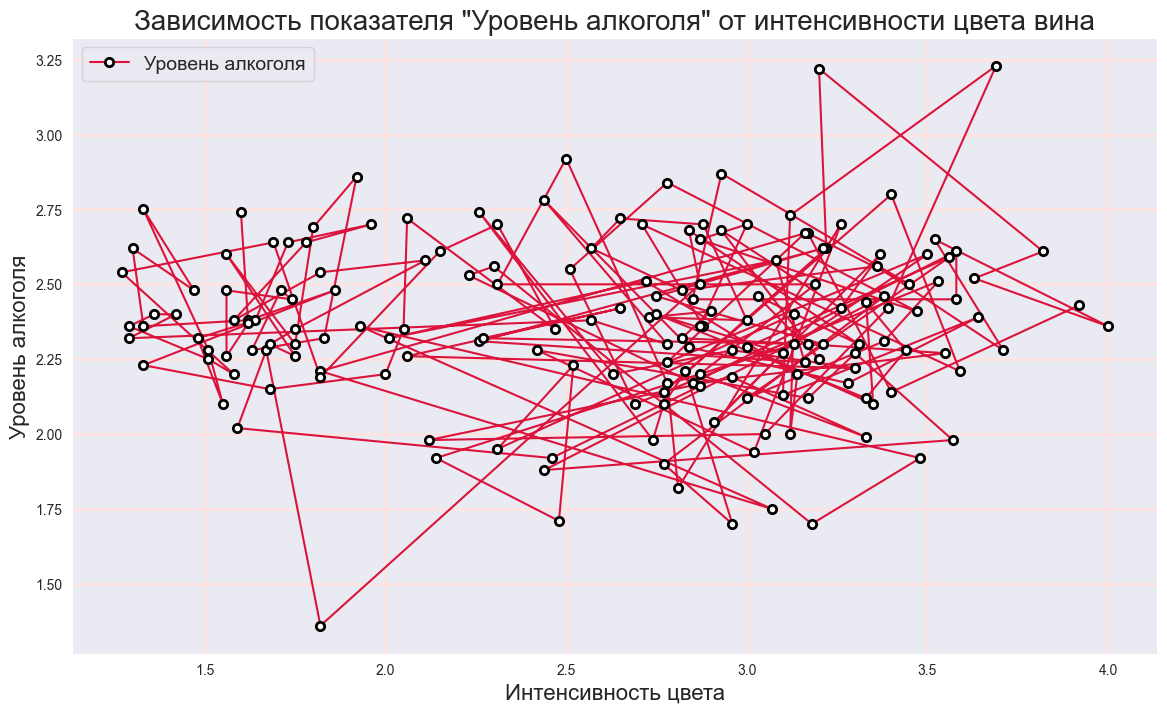

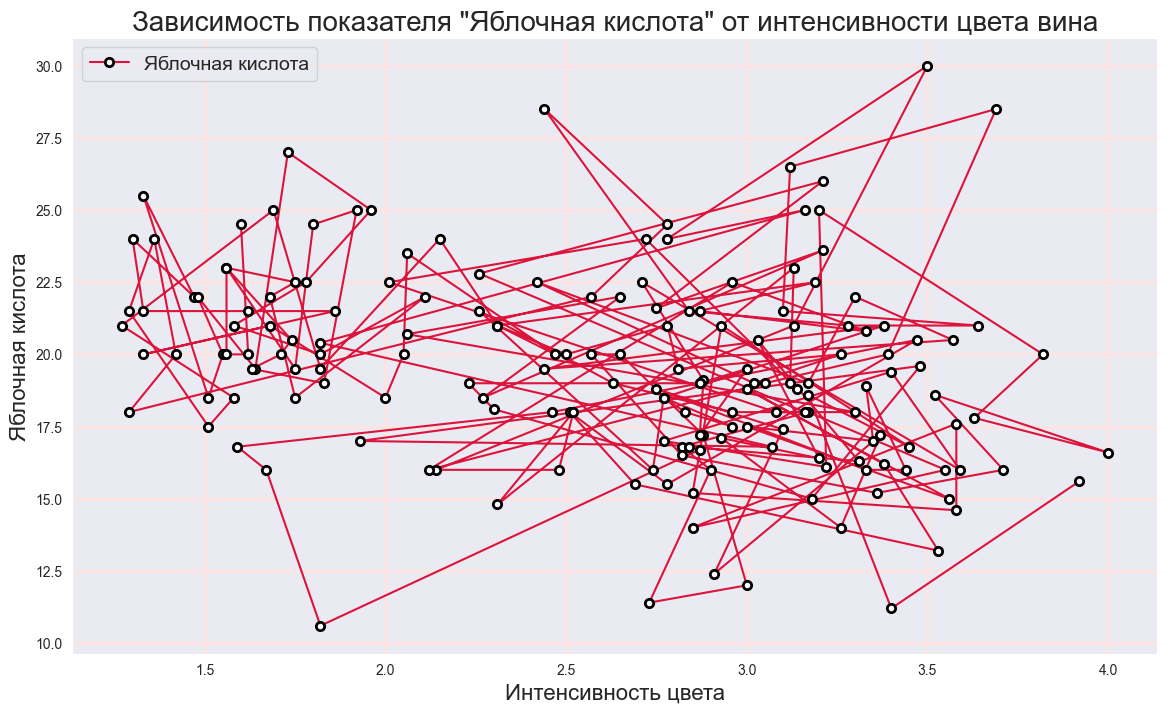

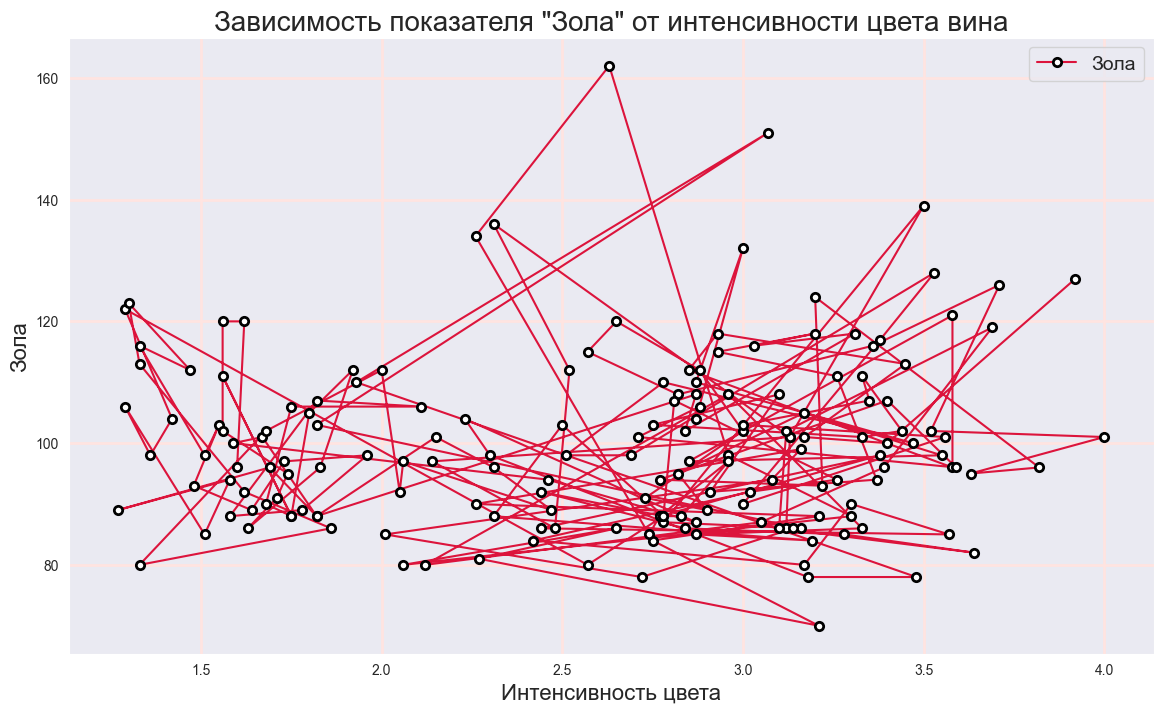

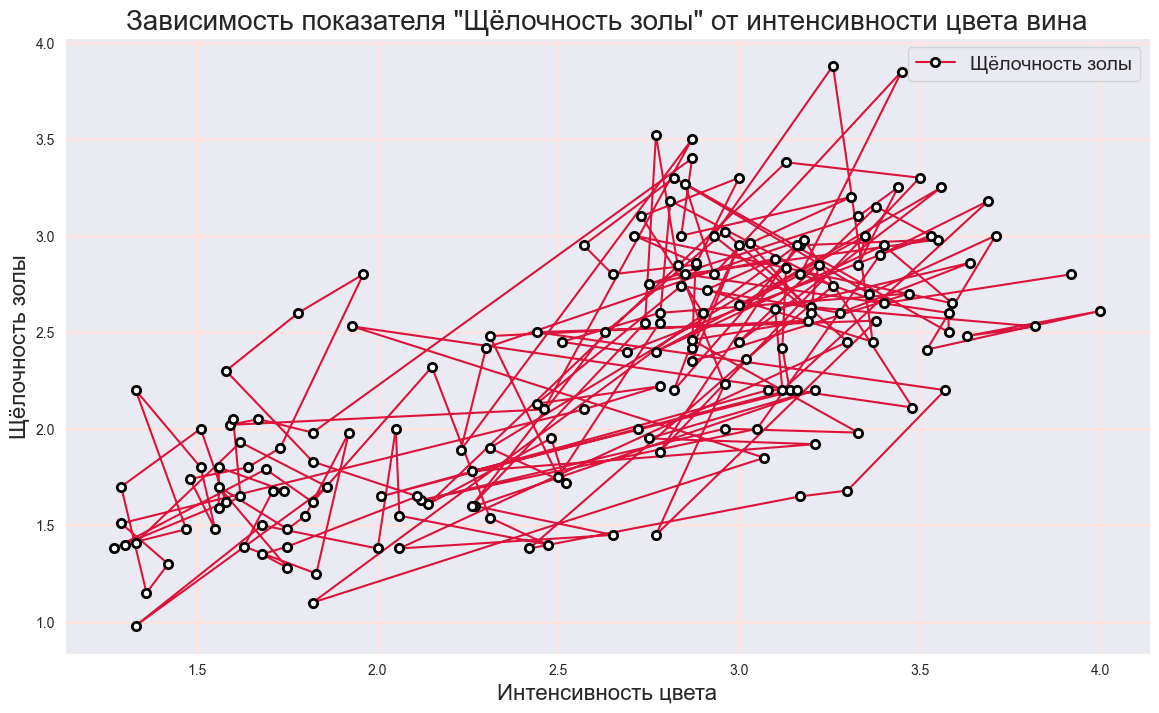

In [15]:
for label, y in dependencies.items():
    plt.figure(figsize=(14, 8))
    plt.plot(x, y, label=label, color='crimson', marker='o', markerfacecolor='white', markeredgewidth=2, markeredgecolor='black') # 5.1
    plt.title(f'Зависимость показателя "{label}" от интенсивности цвета вина', fontsize=20)
    plt.xlabel('Интенсивность цвета', fontsize=16)
    plt.ylabel(label, fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True, linewidth=2, color='mistyrose') # 5.2
    plt.show()

## Задание №6

Выполнить визуализацию многомерных данных, используя t-SNE. Необходимо использовать набор данных MNIST или fashion MNIST (можно использовать и другие готовые наборы данных, где можно наблюдать разделение объектов по кластерам). 

Рассмотреть результаты визуализации для разных значений перплексии.

In [16]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [17]:
zoo_data = pd.read_csv('./data/zoo/zoo.csv')

zoo_data

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  class_type  
0          1           1  
1          1           1  
2          0           4  
3          1           1  
4          1           1  
..       ...         ...  
96         1           1  
97         0           6  
98         1           1  
99         0           7  
100        0           2  

[101 rows x 18 columns]

In [18]:
X = zoo_data.drop(['class_type', 'animal_name'], axis=1)
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

X.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0   1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0       1.0   
1   1.0       0.0   0.0   1.0       0.0      0.0       0.0      1.0       1.0   
2   0.0       0.0   1.0   0.0       0.0      1.0       1.0      1.0       1.0   
3   1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0       1.0   
4   1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0       1.0   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0       1.0       0.0   0.0   0.5   0.0       0.0      1.0  
1       1.0       0.0   0.0   0.5   1.0       0.0      1.0  
2       0.0       0.0   1.0   0.0   1.0       0.0      0.0  
3       1.0       0.0   0.0   0.5   0.0       0.0      1.0  
4       1.0       0.0   0.0   0.5   1.0       0.0      1.0

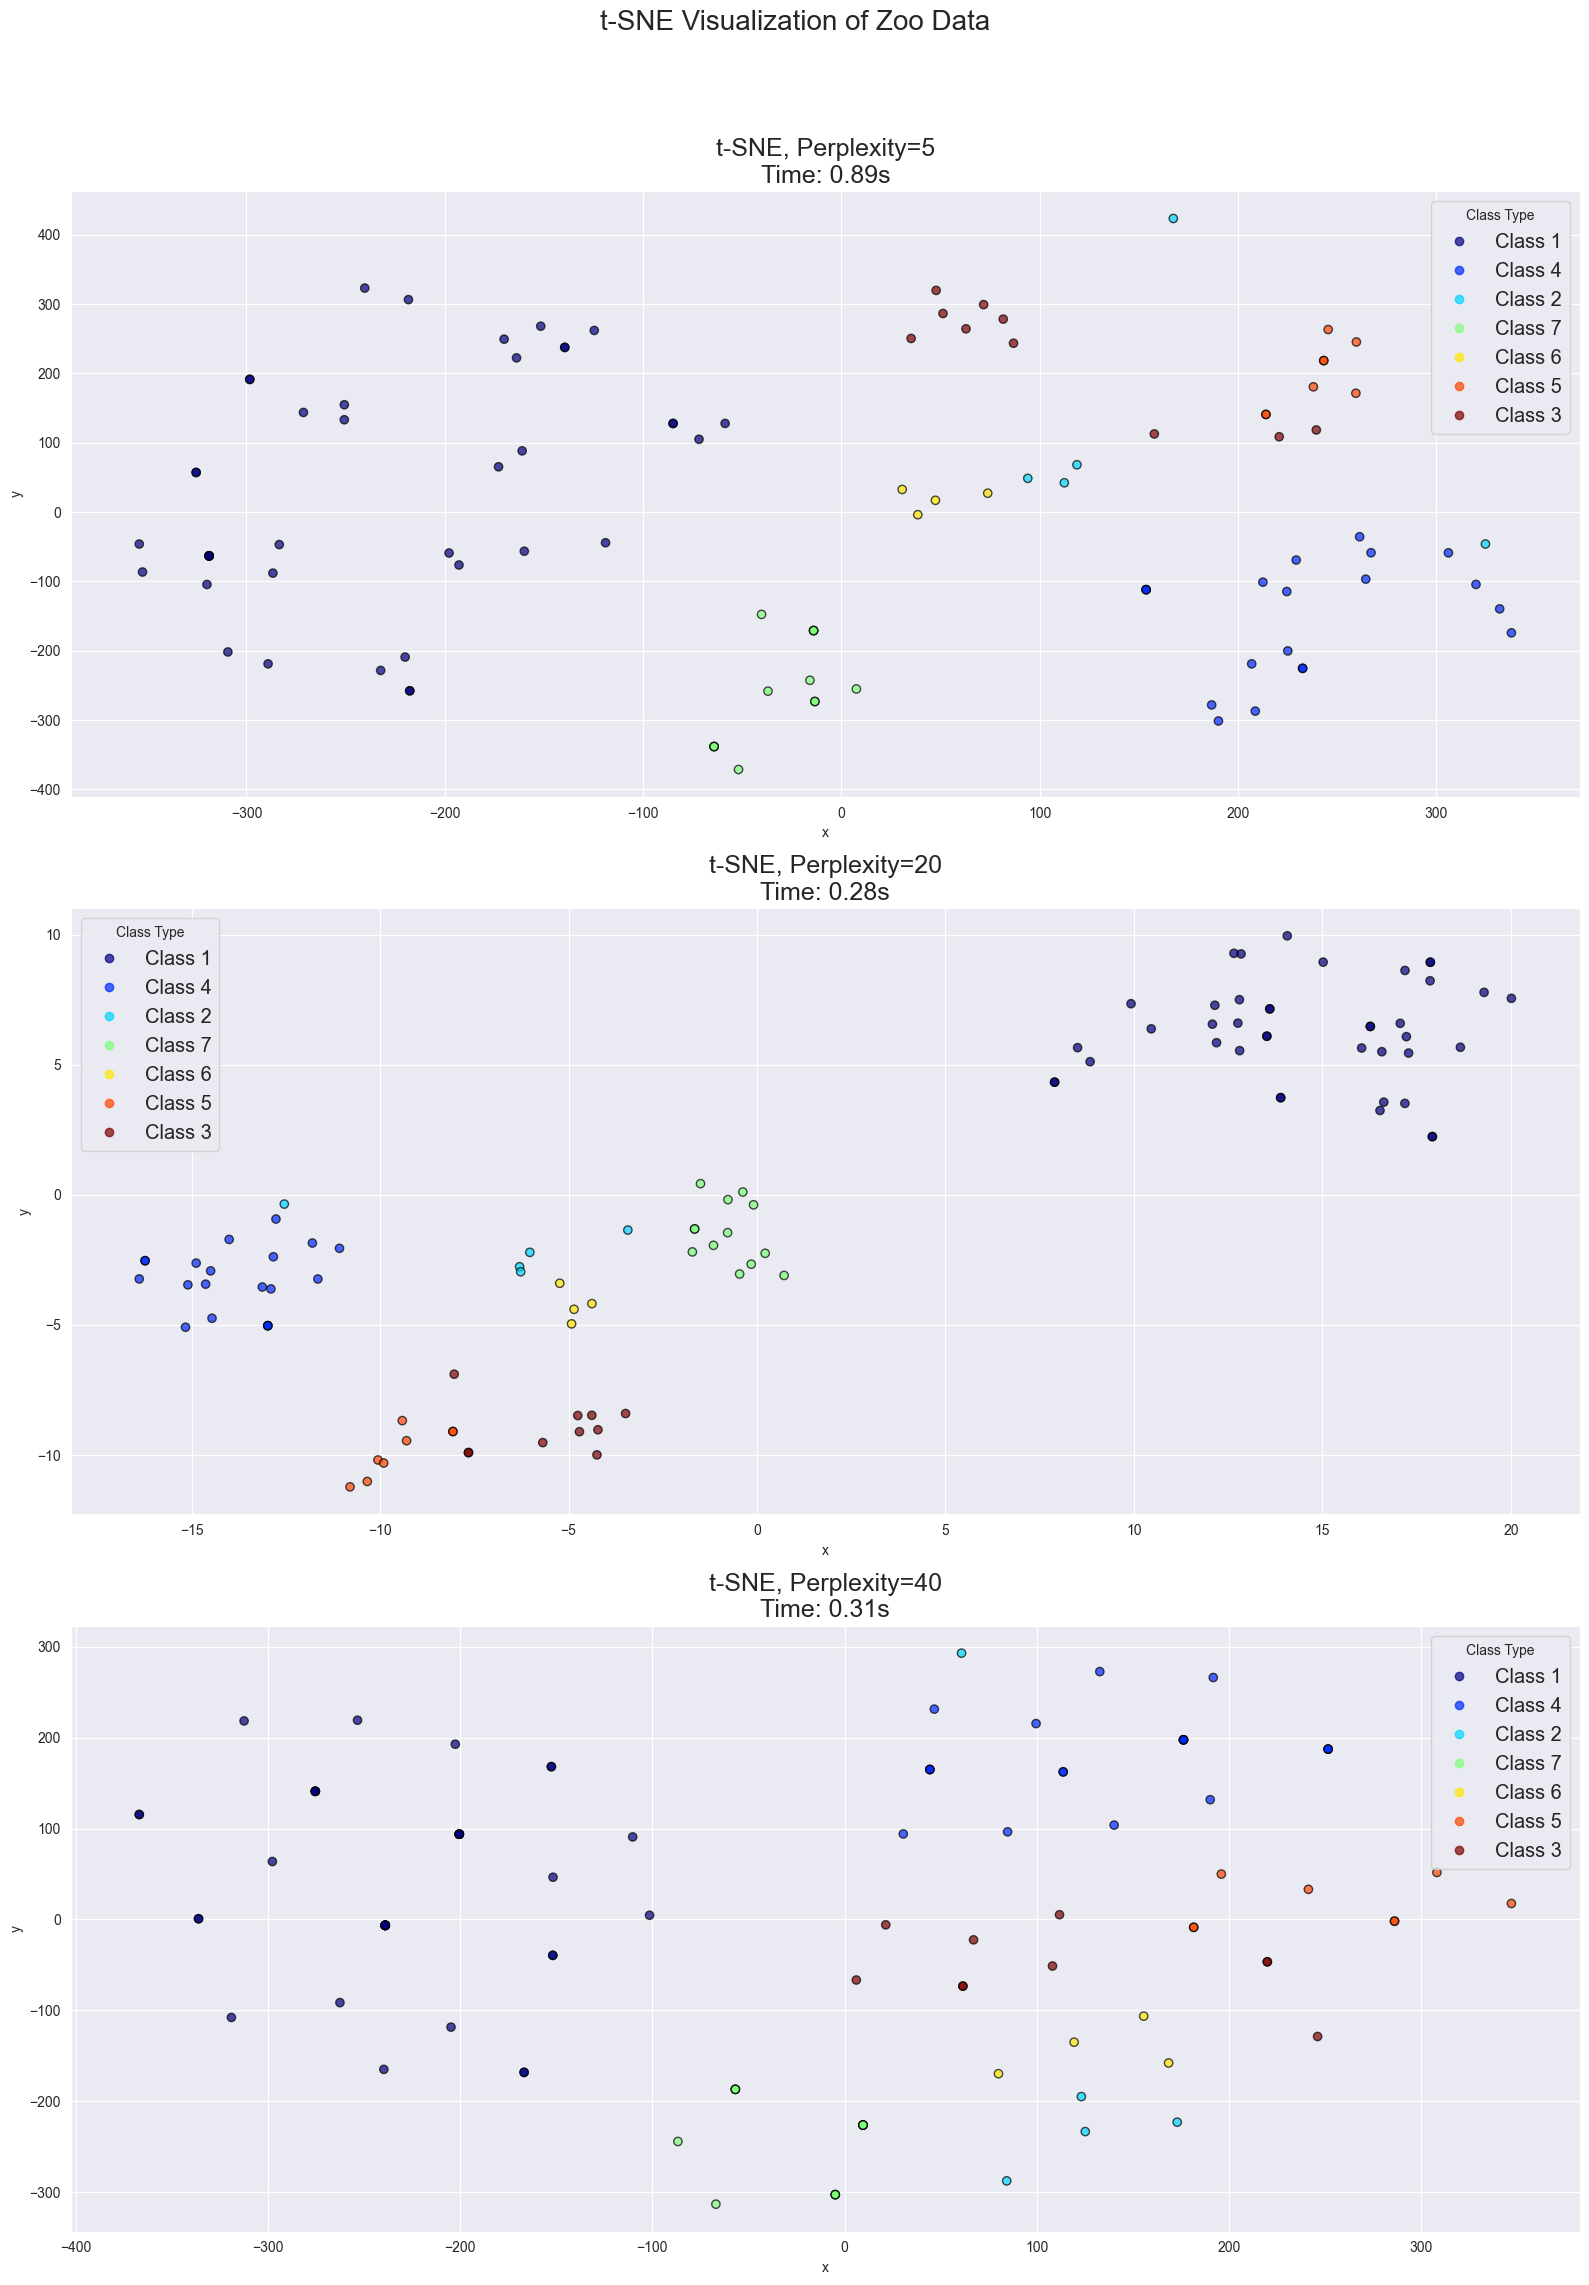

In [19]:
perplexities = [5, 20, 40]

plt.figure(figsize=(16, 24))

unique_labels = zoo_data['class_type'].unique()
legend_labels = [f'Class {int(label)}' for label in unique_labels]

for i, perplexity in enumerate(perplexities, 1):
    start_time = time.time()
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=374)
    X_tsne = tsne.fit_transform(X)
    tsne_time = time.time() - start_time

    plt.subplot(3, 1, i)
    scatter = plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=zoo_data['class_type'], cmap='jet', edgecolor='k', alpha=0.7)
    plt.title(f't-SNE, Perplexity={perplexity}\nTime: {tsne_time:.2f}s', fontsize=18)
    plt.xlabel('x')
    plt.ylabel('y')

    handles, _ = scatter.legend_elements(prop="colors", alpha=0.7)
    plt.legend(handles, legend_labels, title='Class Type', loc='best', fontsize='x-large')

plt.suptitle('t-SNE Visualization of Zoo Data', fontsize=20)
plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()

## Задание №7

Выполнить визуализацию многомерных данных, используя UMAP с
различными параметрами n_neighbors и min_dist. Рассчитать время
работы алгоритма с помощью библиотеки time и сравнить его с
временем работы t-SNE.

In [20]:
from umap import UMAP

/Users/wladischlau/Yandex.Disk.localized/МИРЭА/Технологии и инструментарий анализа больших данных/Практические занятия/Влад/big_data_practices/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [21]:
X = zoo_data.drop(['class_type', 'animal_name'], axis=1)
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

X.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0   1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0       1.0   
1   1.0       0.0   0.0   1.0       0.0      0.0       0.0      1.0       1.0   
2   0.0       0.0   1.0   0.0       0.0      1.0       1.0      1.0       1.0   
3   1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0       1.0   
4   1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0       1.0   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0       1.0       0.0   0.0   0.5   0.0       0.0      1.0  
1       1.0       0.0   0.0   0.5   1.0       0.0      1.0  
2       0.0       0.0   1.0   0.0   1.0       0.0      0.0  
3       1.0       0.0   0.0   0.5   0.0       0.0      1.0  
4       1.0       0.0   0.0   0.5   1.0       0.0      1.0

### Параметры UMAP:

In [22]:
n_neighbors_list = [5, 25, 40]
min_dist_list = [0.1, 0.6]

### График:

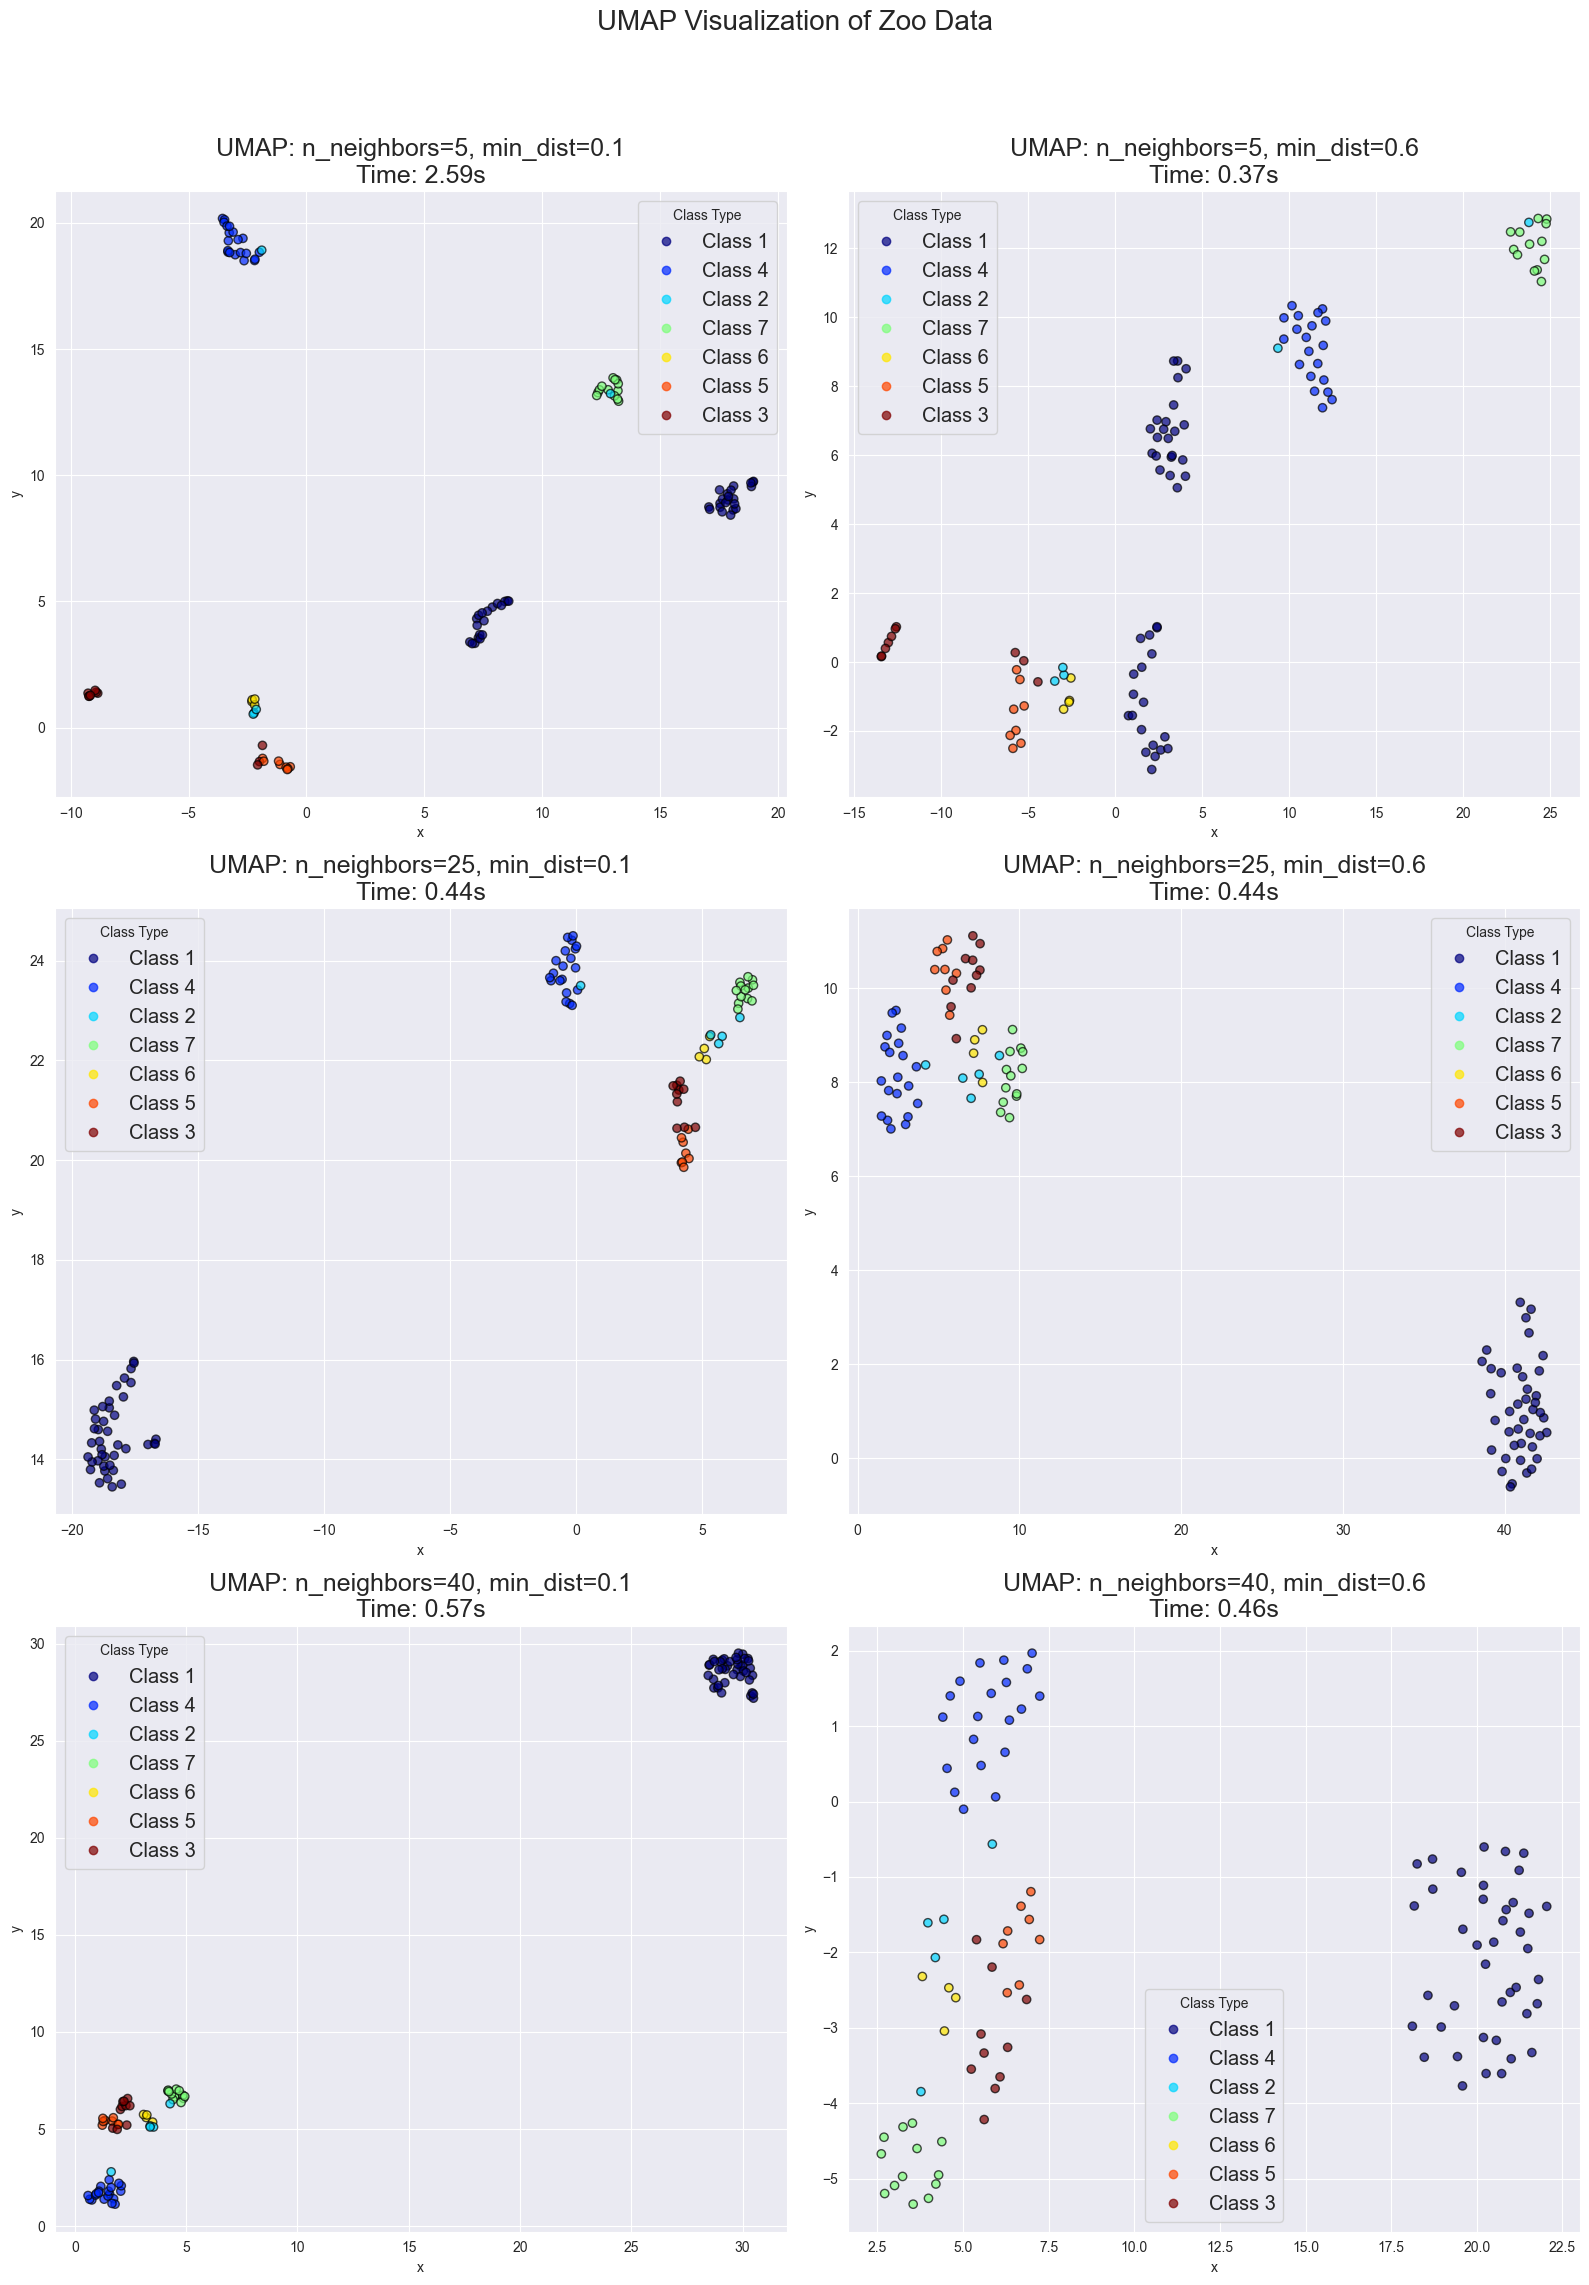

In [23]:
plt.figure(figsize=(16, 24))

plot_index = 1
unique_labels = zoo_data['class_type'].unique()
legend_labels = [f'Class {int(label)}' for label in unique_labels]

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        start_time = time.time()
        umap = UMAP(n_jobs=1, n_neighbors=n_neighbors, min_dist=min_dist, random_state=23)
        X_umap = umap.fit_transform(X)
        umap_time = time.time() - start_time

        plt.subplot(3, 2, plot_index)
        scatter = plt.scatter(x=X_umap[:, 0], y=X_umap[:, 1], c=zoo_data['class_type'], cmap='jet', edgecolor='k', alpha=0.7)
        plt.title(f'UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}\nTime: {umap_time:.2f}s', fontsize=18)
        plt.xlabel('x')
        plt.ylabel('y')

        # Add legend
        handles, _ = scatter.legend_elements(alpha=0.7)
        plt.legend(handles, legend_labels, title='Class Type', loc='best', fontsize='x-large')

        plot_index += 1


plt.suptitle('UMAP Visualization of Zoo Data', fontsize=20)
plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()

### Сравнение t-SNE и UMAP

Время работы алгоритма t-SNE в среднем в три раза меньше, чем время работы алгоритма UMAP.

Разница во времени работы между t-SNE и UMAP является неожиданной, особенно учитывая, что UMAP часто рекламируется как более быстрый алгоритм. t-SNE оказался быстрее, вероятно, из-за особенностей данных, выбранных параметров и особенностей реализации алгоритмов в используемой среде.